In [69]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [70]:
df=pd.read_csv("customer_churn.csv")

In [71]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# DATA WRANGLING AND PREPROCESSING

In [72]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [74]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [75]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [76]:
df1=df[df['TotalCharges'].isnull()]
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [77]:
df = df[~((df['tenure'] == 0) & (df['TotalCharges'].isna()))]

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [79]:
df['AvgMonthlyCharges'] = df['TotalCharges'] / (df['tenure'] )
df['IsLongTerm'] = (df['tenure'] > 12).astype(int)

In [80]:
features=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','Contract','PaperlessBilling','PaymentMethod','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [81]:
for feature in features:
  print(feature ,": has unique values ",list(df[feature].unique()))

PhoneService : has unique values  ['No', 'Yes']
MultipleLines : has unique values  ['No phone service', 'No', 'Yes']
InternetService : has unique values  ['DSL', 'Fiber optic', 'No']
OnlineSecurity : has unique values  ['No', 'Yes', 'No internet service']
OnlineBackup : has unique values  ['Yes', 'No', 'No internet service']
Contract : has unique values  ['Month-to-month', 'One year', 'Two year']
PaperlessBilling : has unique values  ['Yes', 'No']
PaymentMethod : has unique values  ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
DeviceProtection : has unique values  ['No', 'Yes', 'No internet service']
TechSupport : has unique values  ['No', 'Yes', 'No internet service']
StreamingTV : has unique values  ['No', 'Yes', 'No internet service']
StreamingMovies : has unique values  ['No', 'Yes', 'No internet service']


<Axes: xlabel='Churn'>

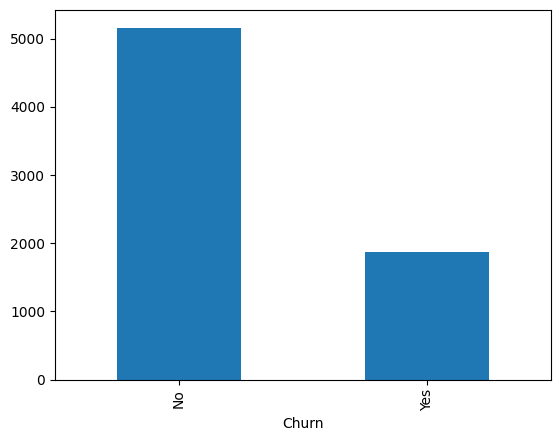

In [82]:
df['Churn'].value_counts().plot(kind='bar')

###RESULT FROM THIS GRAPH
The dataset is a little imbalanced but this can be controlled by logistic regression.

In [83]:
numerical_features=['tenure','MonthlyCharges','TotalCharges','AvgMonthlyCharges']

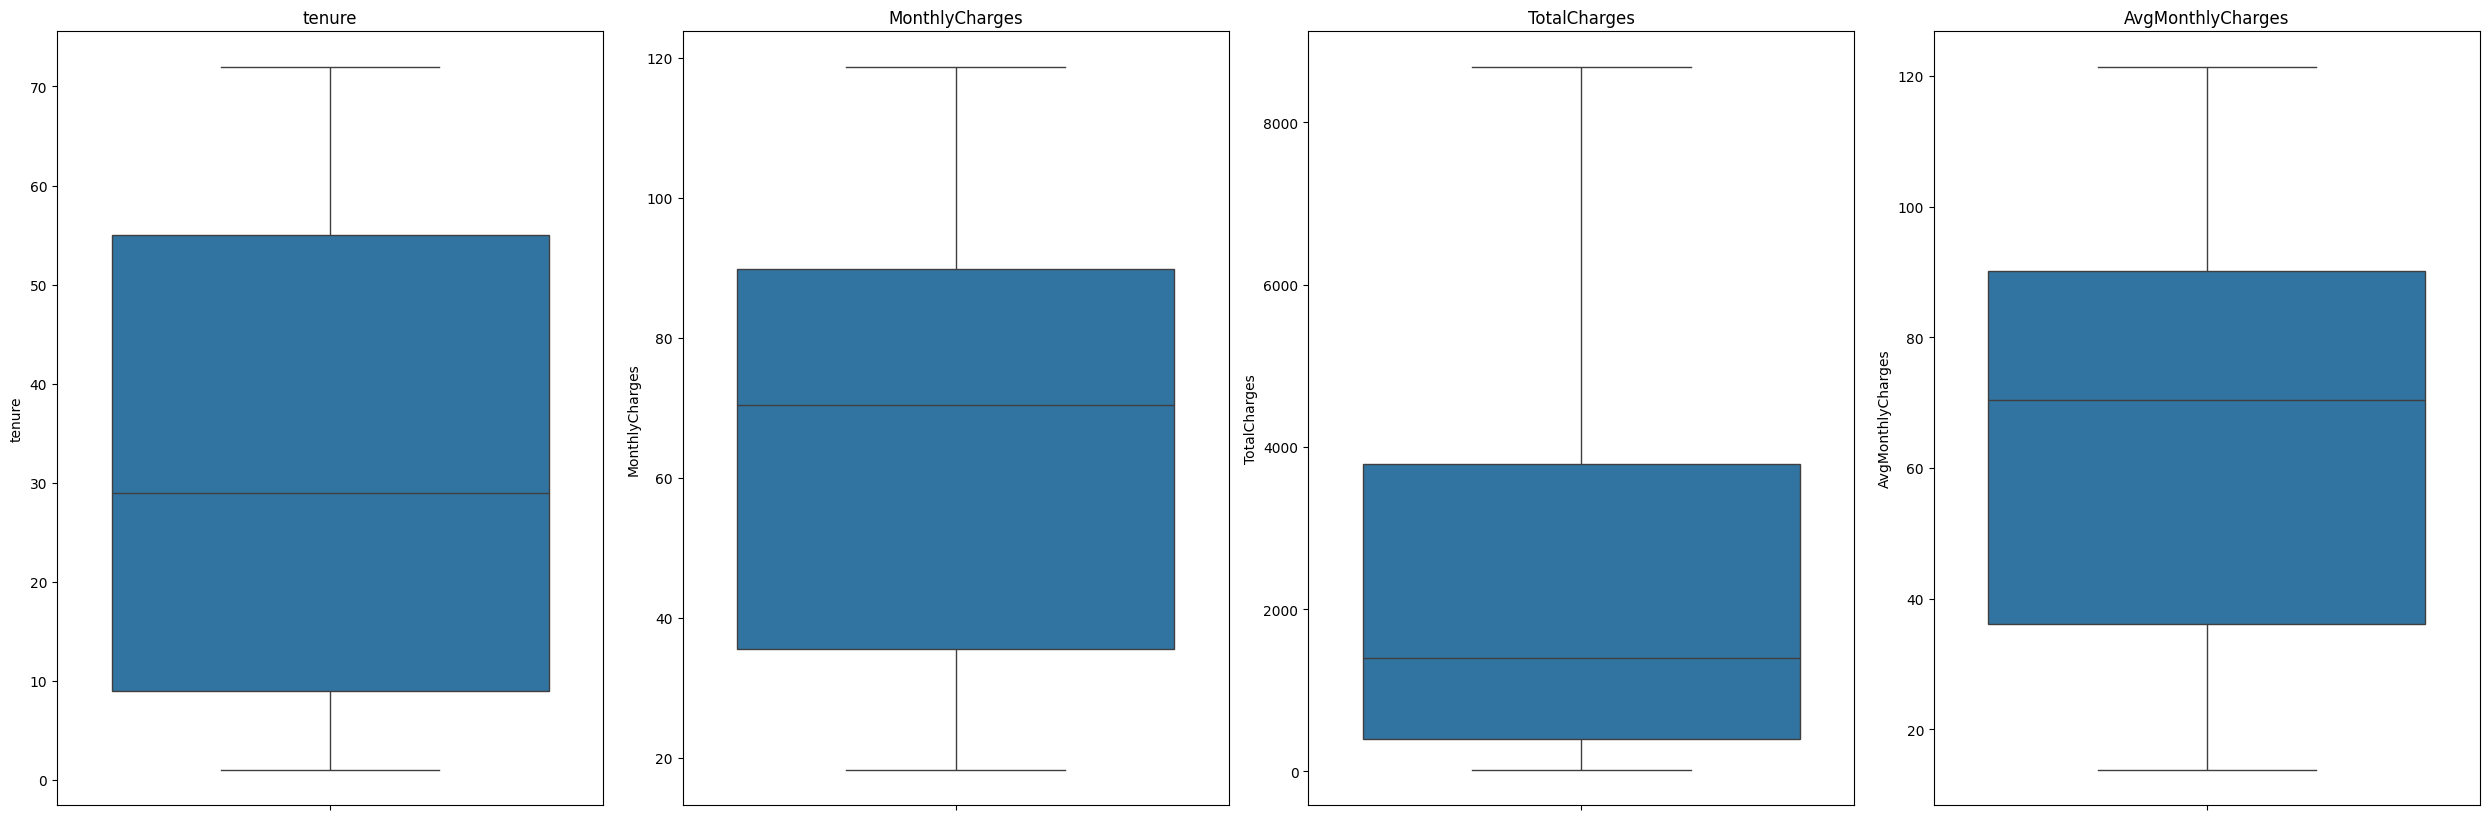

In [84]:
plt.figure(figsize=(25,40))
for i, col in enumerate(numerical_features):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col],data=df,showfliers=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [85]:
df["Binary_Churn"]=df['Churn'].map({"Yes":1,"No":0})

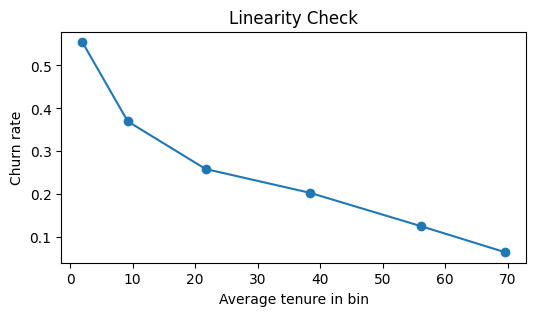

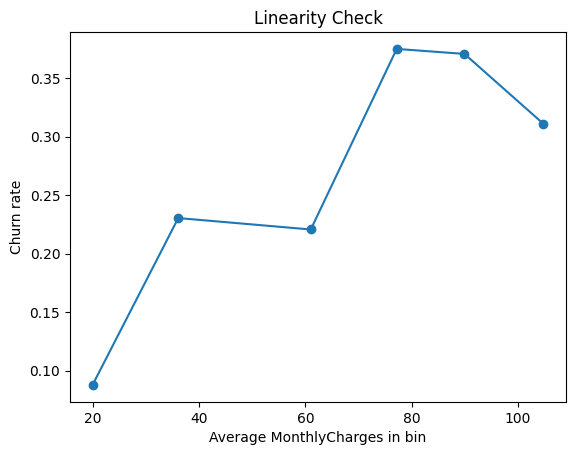

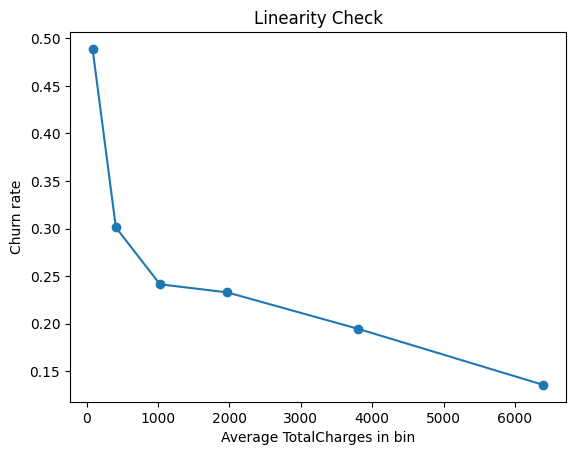

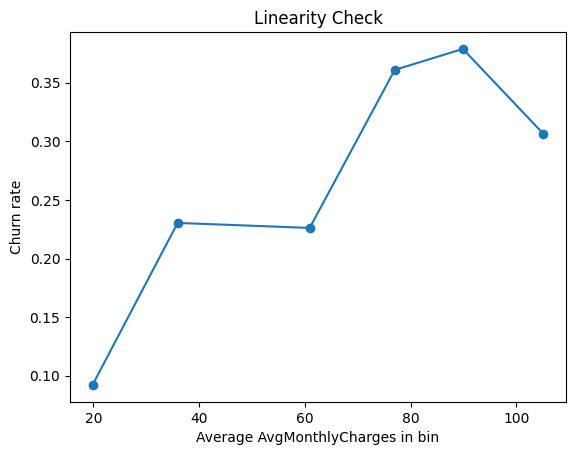

In [86]:
target=df['Binary_Churn']
plt.figure(figsize=(6,3))
for i,col in enumerate(numerical_features):
  df[col+'_bin']=pd.qcut(df[col],q=6,duplicates='drop')
  avg_col="avg_"+col
  summary=df.groupby(col+'_bin').agg(
      **{avg_col:(col,'mean'),"target_rate":(target.name,'mean')}
  ).reset_index()
  plt.plot(summary[avg_col],summary["target_rate"],marker='o')
  plt.title('Linearity Check')
  plt.xlabel(f'Average {col} in bin')
  plt.ylabel('Churn rate')
  plt.figure
  plt.show()

#Result
By boxpots we can see that there are no outliers in the numerical features and the assumption that log odds and independent numerical features have linear relationship is not satisfied for Monthly Charges and Average Monthly Charges which i will try to handle by robust scalar or any transformation.

In [87]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'AvgMonthlyCharges', 'IsLongTerm', 'Binary_Churn', 'tenure_bin',
       'MonthlyCharges_bin', 'TotalCharges_bin', 'AvgMonthlyCharges_bin'],
      dtype='object')

In [88]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,AvgMonthlyCharges,IsLongTerm,Binary_Churn,tenure_bin,MonthlyCharges_bin,TotalCharges_bin,AvgMonthlyCharges_bin
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,29.85,No,29.850000,0,0,"(0.999, 4.0]","(21.15, 50.4]","(18.799, 197.95]","(22.843, 50.596]"
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.50,No,55.573529,1,0,"(29.0, 47.0]","(50.4, 70.35]","(1397.475, 2745.367]","(50.596, 70.373]"
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,Yes,54.075000,0,1,"(0.999, 4.0]","(50.4, 70.35]","(18.799, 197.95]","(50.596, 70.373]"
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,42.30,1840.75,No,40.905556,1,0,"(29.0, 47.0]","(21.15, 50.4]","(1397.475, 2745.367]","(22.843, 50.596]"
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,70.70,151.65,Yes,75.825000,0,1,"(0.999, 4.0]","(70.35, 84.0]","(18.799, 197.95]","(70.373, 83.26]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,84.80,1990.50,No,82.937500,1,0,"(14.0, 29.0]","(84.0, 96.15]","(1397.475, 2745.367]","(70.373, 83.26]"
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,103.20,7362.90,No,102.262500,1,0,"(64.0, 72.0]","(96.15, 118.75]","(4919.842, 8684.8]","(96.631, 121.4]"
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,29.60,346.45,No,31.495455,0,0,"(4.0, 14.0]","(21.15, 50.4]","(197.95, 678.367]","(22.843, 50.596]"
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,74.40,306.60,Yes,76.650000,0,1,"(0.999, 4.0]","(70.35, 84.0]","(197.95, 678.367]","(70.373, 83.26]"


#MODEL BUILDING

In [89]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [90]:
X=df.drop('Binary_Churn',axis=1)
y=df['Binary_Churn']

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.35,random_state=42)

In [92]:
X_test.shape

(2462, 27)

In [93]:
categorical_cols=['gender','Partner','Dependents','PhoneService', 'MultipleLines', 'InternetService',
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                  'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling',
                  'PaymentMethod']

In [94]:
ohe=OneHotEncoder(sparse_output=False,drop='first')
encoded=ohe.fit_transform(X_train[categorical_cols])

In [95]:
encoded_X_train=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(categorical_cols),index=X_train.index)
X_train_encoded=pd.concat([X_train.drop(categorical_cols, axis=1),encoded_X_train],axis=1)

In [96]:
encoded_test=ohe.transform(X_test[categorical_cols])
encoded_X_test=pd.DataFrame(encoded_test,columns=ohe.get_feature_names_out(categorical_cols),index=X_test.index)
X_test_encoded=pd.concat([X_test.drop(categorical_cols, axis=1), encoded_X_test],axis=1)

In [97]:
from sklearn.feature_selection import mutual_info_classif

In [98]:
X_train_encoded=X_train_encoded.drop(['Churn', 'tenure_bin','MonthlyCharges_bin', 'TotalCharges_bin','customerID','AvgMonthlyCharges_bin'],axis=1)
X_test_encoded=X_test_encoded.drop(['Churn', 'tenure_bin','MonthlyCharges_bin', 'TotalCharges_bin','customerID','AvgMonthlyCharges_bin'],axis=1)

In [99]:
result=mutual_info_classif(X_train_encoded,y_train,discrete_features='auto')

In [100]:
MI_scores=pd.Series(data=result,index=X_train_encoded.columns).sort_values(ascending=False)

In [101]:
MI_scores

,0
tenure,0.071603
Contract_Two year,0.064580
InternetService_Fiber optic,0.051758
IsLongTerm,0.050138
AvgMonthlyCharges,0.039914
MonthlyCharges,0.039256
OnlineSecurity_No internet service,0.036311
PaymentMethod_Electronic check,0.035877
StreamingMovies_No internet service,0.034589
TotalCharges,0.033914


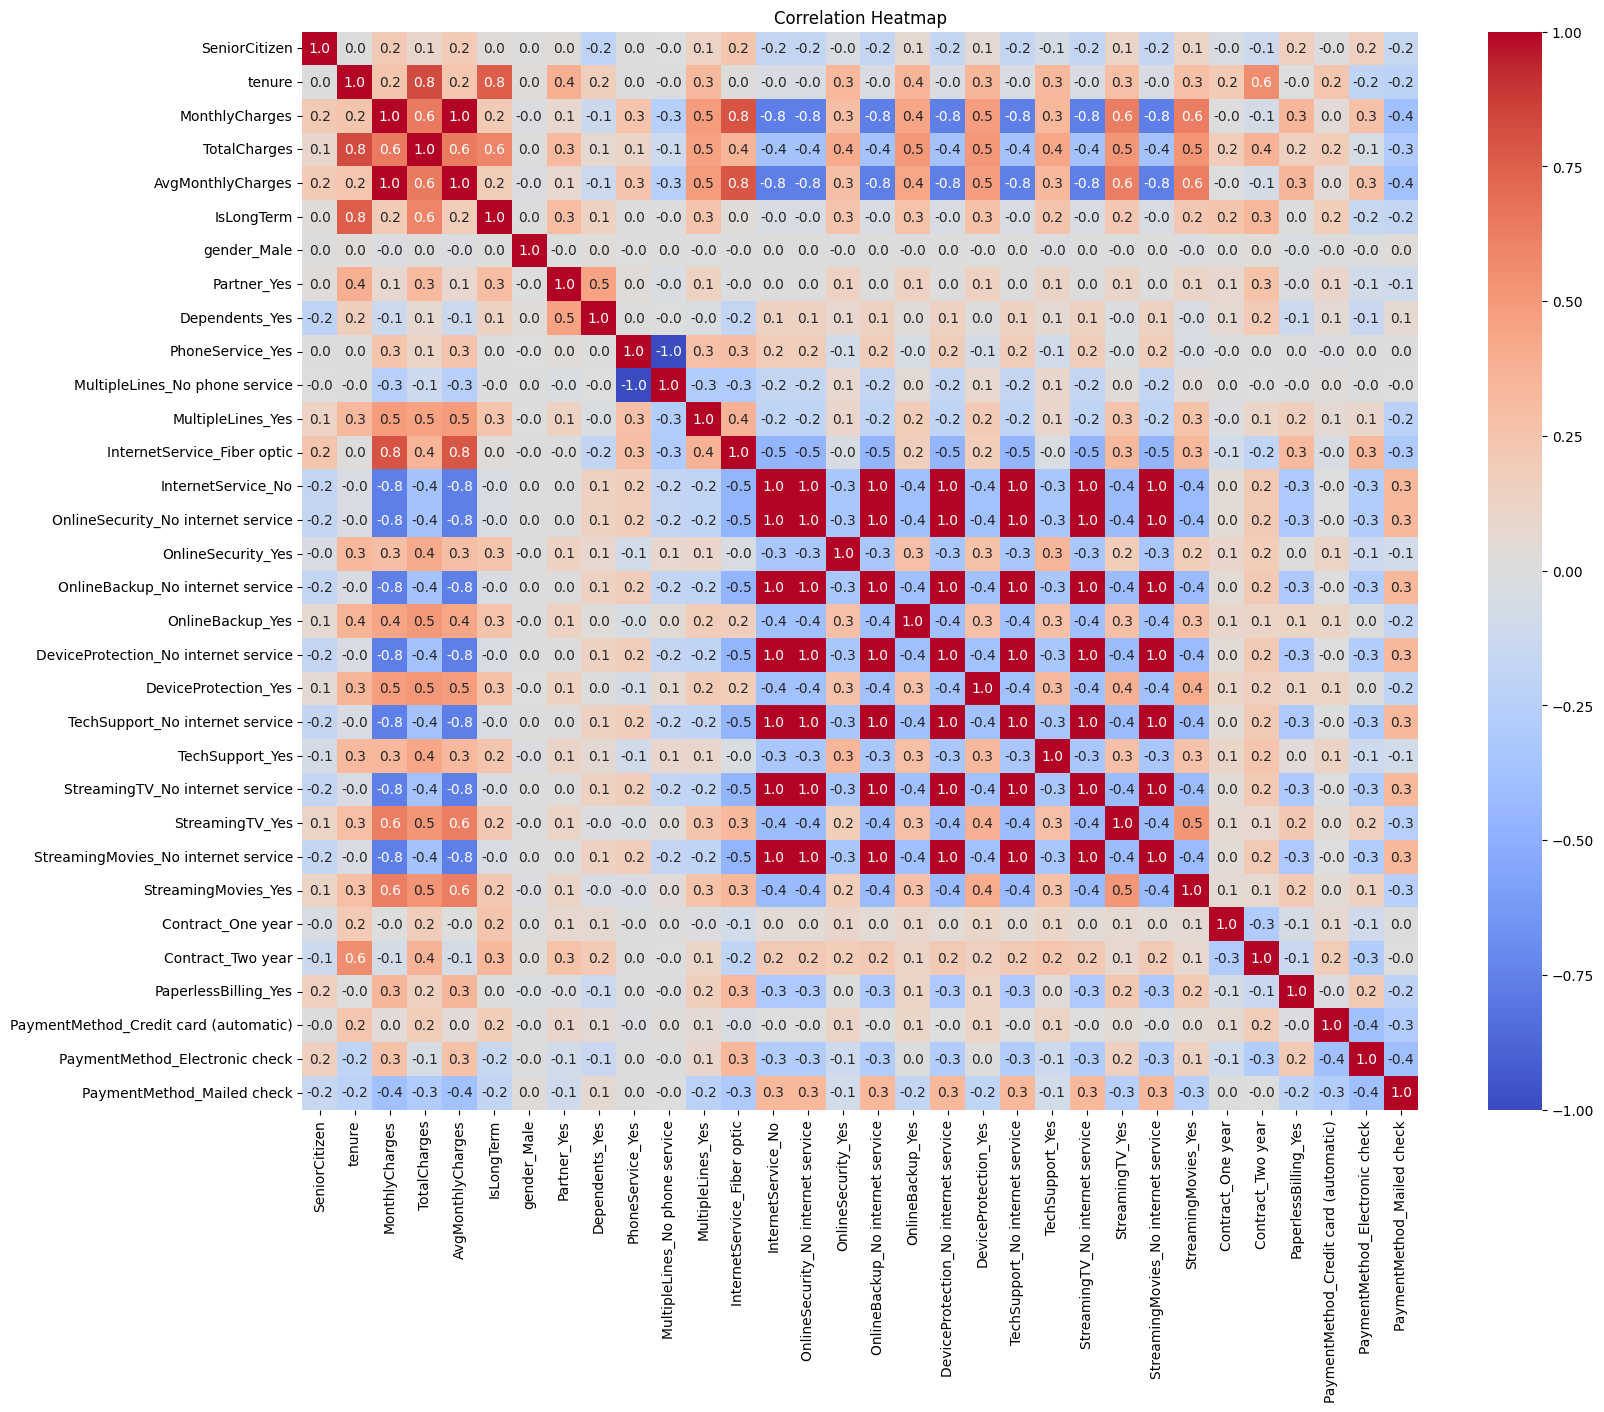

In [102]:
corr_matrix = X_train_encoded.corr(numeric_only=True)
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [103]:
def Correlation(df,threshold):
  col_corr=set()
  corr_matrix=df.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i][j]>threshold):
        col_name=corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr

In [104]:
dropping_features=list(Correlation(X_train_encoded,0.8))
dropping_features

['StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'AvgMonthlyCharges',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'TotalCharges',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service']

In [105]:
X_train_encoded=X_train_encoded.drop(dropping_features,axis=1)
X_test_encoded=X_test_encoded.drop(dropping_features,axis=1)

In [106]:
MI_scores=MI_scores.loc[X_train_encoded.columns].sort_values(ascending=False)

In [107]:
MI_scores

,0
tenure,0.071603
Contract_Two year,0.064580
InternetService_Fiber optic,0.051758
IsLongTerm,0.050138
MonthlyCharges,0.039256
PaymentMethod_Electronic check,0.035877
Contract_One year,0.029553
InternetService_No,0.025681
TechSupport_Yes,0.022208
Dependents_Yes,0.019653


In [108]:
dropped_features=MI_scores.loc[MI_scores<=0]
MI_scores=MI_scores.loc[MI_scores>0]

In [109]:
X_train_encoded=X_train_encoded.drop(dropped_features.index,axis=1)
X_test_encoded=X_test_encoded.drop(dropped_features.index,axis=1)

In [110]:
X_train_encoded.shape

(4570, 21)

In [111]:
from sklearn.feature_selection import VarianceThreshold
select=VarianceThreshold(threshold=0.02)
X_left=select.fit_transform(X_train_encoded)

In [112]:
left_column=X_train_encoded.columns[select.get_support()]
left_column

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'IsLongTerm',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check'],
      dtype='object')

In [113]:
numerical_features=['tenure','MonthlyCharges']

In [114]:
from sklearn.preprocessing import RobustScaler

In [115]:
scalar=RobustScaler()
X_train_encoded[numerical_features]=scalar.fit_transform(X_train_encoded[numerical_features])
X_test_encoded[numerical_features]=scalar.transform(X_test_encoded[numerical_features])

In [116]:
regression=LogisticRegression(class_weight='balanced')

In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
parameters={"penalty":['l1','l2','elasticnet'],
            "C":[ 0.05,0.01, 0.1, 1],
            'max_iter':[50,75,100,200],
            "solver": ['liblinear','saga','sag']}

In [119]:
grid=GridSearchCV(regression,param_grid=parameters,cv=5,n_jobs=-1,scoring='recall')

In [120]:
grid.fit(X_train_encoded,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.05, 0.01, 0.1, 1],
                         'max_iter': [50, 75, 100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga', 'sag']},
             scoring='recall')

In [121]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.01, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
0.8050162930779106


In [122]:
y_pred=grid.predict(X_test_encoded)

In [123]:
from sklearn.metrics import recall_score,confusion_matrix,precision_score,roc_auc_score,roc_curve

In [124]:
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8087774294670846
0.48314606741573035


In [125]:
print(confusion_matrix(y_test,y_pred))

[[1272  552]
 [ 122  516]]


In [126]:
y_proba = grid.predict_proba(X_test_encoded)[:, 1]
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)

AUC Score: 0.8290625171863828


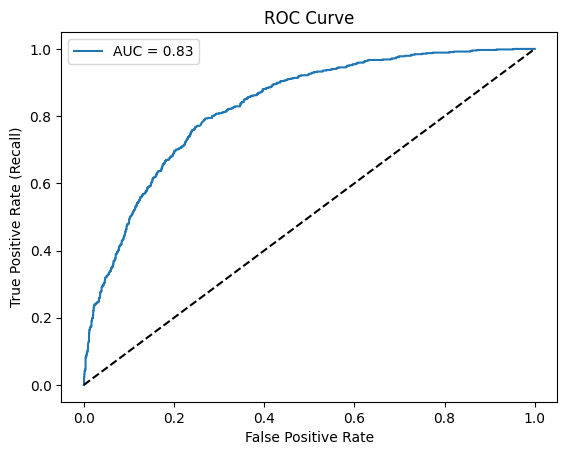

In [127]:
fpr,tpr,thresholds =roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()

#CONCLUSION
The dataset was clearly imbalanced, which you can see in the graph above. I tackled this by using Logistic Regression and adjusting it to handle class imbalance. The model reached a recall of about 81%, which is exactly what matters most here. In churn prediction, the main goal is to catch as many customers who might leave as possible, so the company can step in before they go.

The precision is a bit lower of about 49%, but that's a trade-off. It means we might contact a few customers who weren't actually going to leave — but that's better than missing people who were ready to walk away. In this case, saving at-risk customers outweighs the occasional false alarm.